# **Часть 1** - Очистка данных

In [1]:
import numpy as np
import pandas as pd
!pip install xlsxwriter
import xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 4.1 MB/s 


In [2]:
sheet_url = "https://docs.google.com/spreadsheets/d/165sp-lWd1L4qWxggw25DJo_njOCvzdUjAd414NSE8co/edit#gid=1439079331"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

### Импортируем датасет из гугл-таблицы

In [3]:
data = pd.read_csv(url_1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          228 non-null    object 
 1   cluster       228 non-null    float64
 2   cluster_name  228 non-null    object 
 3   keyword       228 non-null    object 
 4   good (1)      227 non-null    float64
 5   count         227 non-null    object 
 6   x             228 non-null    float64
 7   y             228 non-null    object 
dtypes: float64(3), object(5)
memory usage: 14.4+ KB


### Создаем срез с нужными нам колонками и создаем колонку для цвета

In [4]:
data = data[['area', 'cluster', 'cluster_name', 'keyword', 'x', 'y', 'count']]

In [5]:
data['color'] = [''] * len(data.index)
data.head()

,area,cluster,cluster_name,keyword,x,y,count,color
0,eligibility,0.0,Кластер 0,several animated buried,5.772342,12.564796257345005,1260,
1,eligibility,0.0,Кластер 0,singles unusual buyers,14.829280,7.8507285727125815,866,
2,eligibility,0.0,Кластер 0,hawaiian directive,11.381856,3.8981370219558604,163,
3,eligibility,0.0,Кластер 0,dynamics directly,9.980149,6.281427914064545,1146,
4,eligibility,1.0,Кластер 1,decision surgeons montreal,3.283940,4.39674063521296,823,


### Избавляемся от дубликатов в одних и тех же областях

In [6]:
data = data.drop_duplicates(subset=['area', 'keyword'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          221 non-null    object 
 1   cluster       221 non-null    float64
 2   cluster_name  221 non-null    object 
 3   keyword       221 non-null    object 
 4   x             221 non-null    float64
 5   y             221 non-null    object 
 6   count         220 non-null    object 
 7   color         222 non-null    object 
dtypes: float64(2), object(6)
memory usage: 15.6+ KB


### Избавляемся от ячеек с битыми данными, а также от ячеек с пустыми значениями

In [7]:
data['y'] = pd.to_numeric(data['y'], errors='coerce')
data['count'] = pd.to_numeric(data['count'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          221 non-null    object 
 1   cluster       221 non-null    float64
 2   cluster_name  221 non-null    object 
 3   keyword       221 non-null    object 
 4   x             221 non-null    float64
 5   y             220 non-null    float64
 6   count         218 non-null    float64
 7   color         222 non-null    object 
dtypes: float64(4), object(4)
memory usage: 15.6+ KB


In [8]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          217 non-null    object 
 1   cluster       217 non-null    float64
 2   cluster_name  217 non-null    object 
 3   keyword       217 non-null    object 
 4   x             217 non-null    float64
 5   y             217 non-null    float64
 6   count         217 non-null    float64
 7   color         217 non-null    object 
dtypes: float64(4), object(4)
memory usage: 15.3+ KB


### Заполняем колонку цветов по приведенным в ТЗ правилам

In [9]:
u_cl = data['cluster'].unique()
conditions =[
    (data['cluster'] == u_cl[0]),
    (data['cluster'] == u_cl[1]),
    (data['cluster'] == u_cl[2]),
    (data['cluster'] == u_cl[3])
]
color_values = ['#17becf', '#bcbd22', '#7f7f7f', '#e377c2']
data['color'] = np.select(conditions, color_values)
data.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,area,cluster,cluster_name,keyword,x,y,count,color
0,eligibility,0.0,Кластер 0,several animated buried,5.772342,12.564796,1260.0,#17becf
1,eligibility,0.0,Кластер 0,singles unusual buyers,14.829280,7.850729,866.0,#17becf
2,eligibility,0.0,Кластер 0,hawaiian directive,11.381856,3.898137,163.0,#17becf
3,eligibility,0.0,Кластер 0,dynamics directly,9.980149,6.281428,1146.0,#17becf
4,eligibility,1.0,Кластер 1,decision surgeons montreal,3.283940,4.396741,823.0,#bcbd22
5,eligibility,1.0,Кластер 1,knives everybody,5.607192,13.155189,1377.0,#bcbd22
6,eligibility,1.0,Кластер 1,lighting observe,11.419919,3.161711,281.0,#bcbd22
7,eligibility,1.0,Кластер 1,payday oriental,8.035720,2.965695,1501.0,#bcbd22
8,eligibility,1.0,Кластер 1,vampire injured,5.247683,0.779161,139.0,#bcbd22
10,eligibility,2.0,Кластер 2,heavily responsible,4.783522,7.172435,309.0,#7f7f7f


### Выполняем сортировку значений по ТЗ

In [10]:
data = data.sort_values(['area', 'cluster', 'cluster_name', 'count'], ascending=[True, True, True, False])
data.head(30)

,area,cluster,cluster_name,keyword,x,y,count,color
106,ar\vr,0.0,Кластер 0,written conflict fabulous,2.991167,7.106799,1443.0,#17becf
108,ar\vr,0.0,Кластер 0,reservations linking,10.195602,12.259496,751.0,#17becf
107,ar\vr,0.0,Кластер 0,interfaces neutral,10.443533,13.809915,586.0,#17becf
109,ar\vr,0.0,Кластер 0,committees parallel,6.735260,3.613983,173.0,#17becf
110,ar\vr,1.0,Кластер 1,postcards looked republic detector,10.474474,6.220012,1397.0,#bcbd22
112,ar\vr,1.0,Кластер 1,michael tobacco,6.210880,12.721264,1007.0,#bcbd22
111,ar\vr,1.0,Кластер 1,filling volunteers academics,10.833920,8.652737,773.0,#bcbd22
113,ar\vr,1.0,Кластер 1,celtic automation,12.197275,4.723751,715.0,#bcbd22
116,ar\vr,2.0,Кластер 2,enquiries implementation,3.580718,8.089951,1249.0,#7f7f7f
115,ar\vr,2.0,Кластер 2,previously standing languages commands,14.668089,8.467136,889.0,#7f7f7f


### Сохраняем данные с закрепленными заголовками и автофильтрами колонок

In [11]:
writer = pd.ExcelWriter('formated.xlsx', engine='xlsxwriter')
workbook  = writer.book
data.to_excel(writer, sheet_name='Sheet1', index=False, freeze_panes=(1,0))
worksheet = writer.sheets["Sheet1"]
(max_row, max_col) = data.shape

worksheet.set_column(0,  max_col - 1, 12)
worksheet.autofilter(0, 0, max_row, max_col - 1)
writer.save()

# **Часть 2** - Создание диаграмм рассеивания

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install adjustText
from adjustText import adjust_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 106 to 104
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          217 non-null    object 
 1   cluster       217 non-null    float64
 2   cluster_name  217 non-null    object 
 3   keyword       217 non-null    object 
 4   x             217 non-null    float64
 5   y             217 non-null    float64
 6   count         217 non-null    float64
 7   color         217 non-null    object 
dtypes: float64(4), object(4)
memory usage: 15.3+ KB


### Отделение данных для отдельной зоны и организация переноса слишком длинных словосочетаний

In [190]:
areas = data['area'].unique()
counter = 12
plot_data = data[data['area'] == areas[counter]]
for row in range(0, plot_data.shape[0]):
  if len(plot_data['keyword'].iloc[row].split()) > 2:
    # print(plot_data['keyword'].iloc[row].split())
    plot_data['keyword'].iloc[row] = ' '.join(plot_data['keyword'].iloc[row].split()[:2])+"\n"+' '.join(plot_data['keyword'].iloc[row].split()[2:])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Построение диаграммы рассеяния

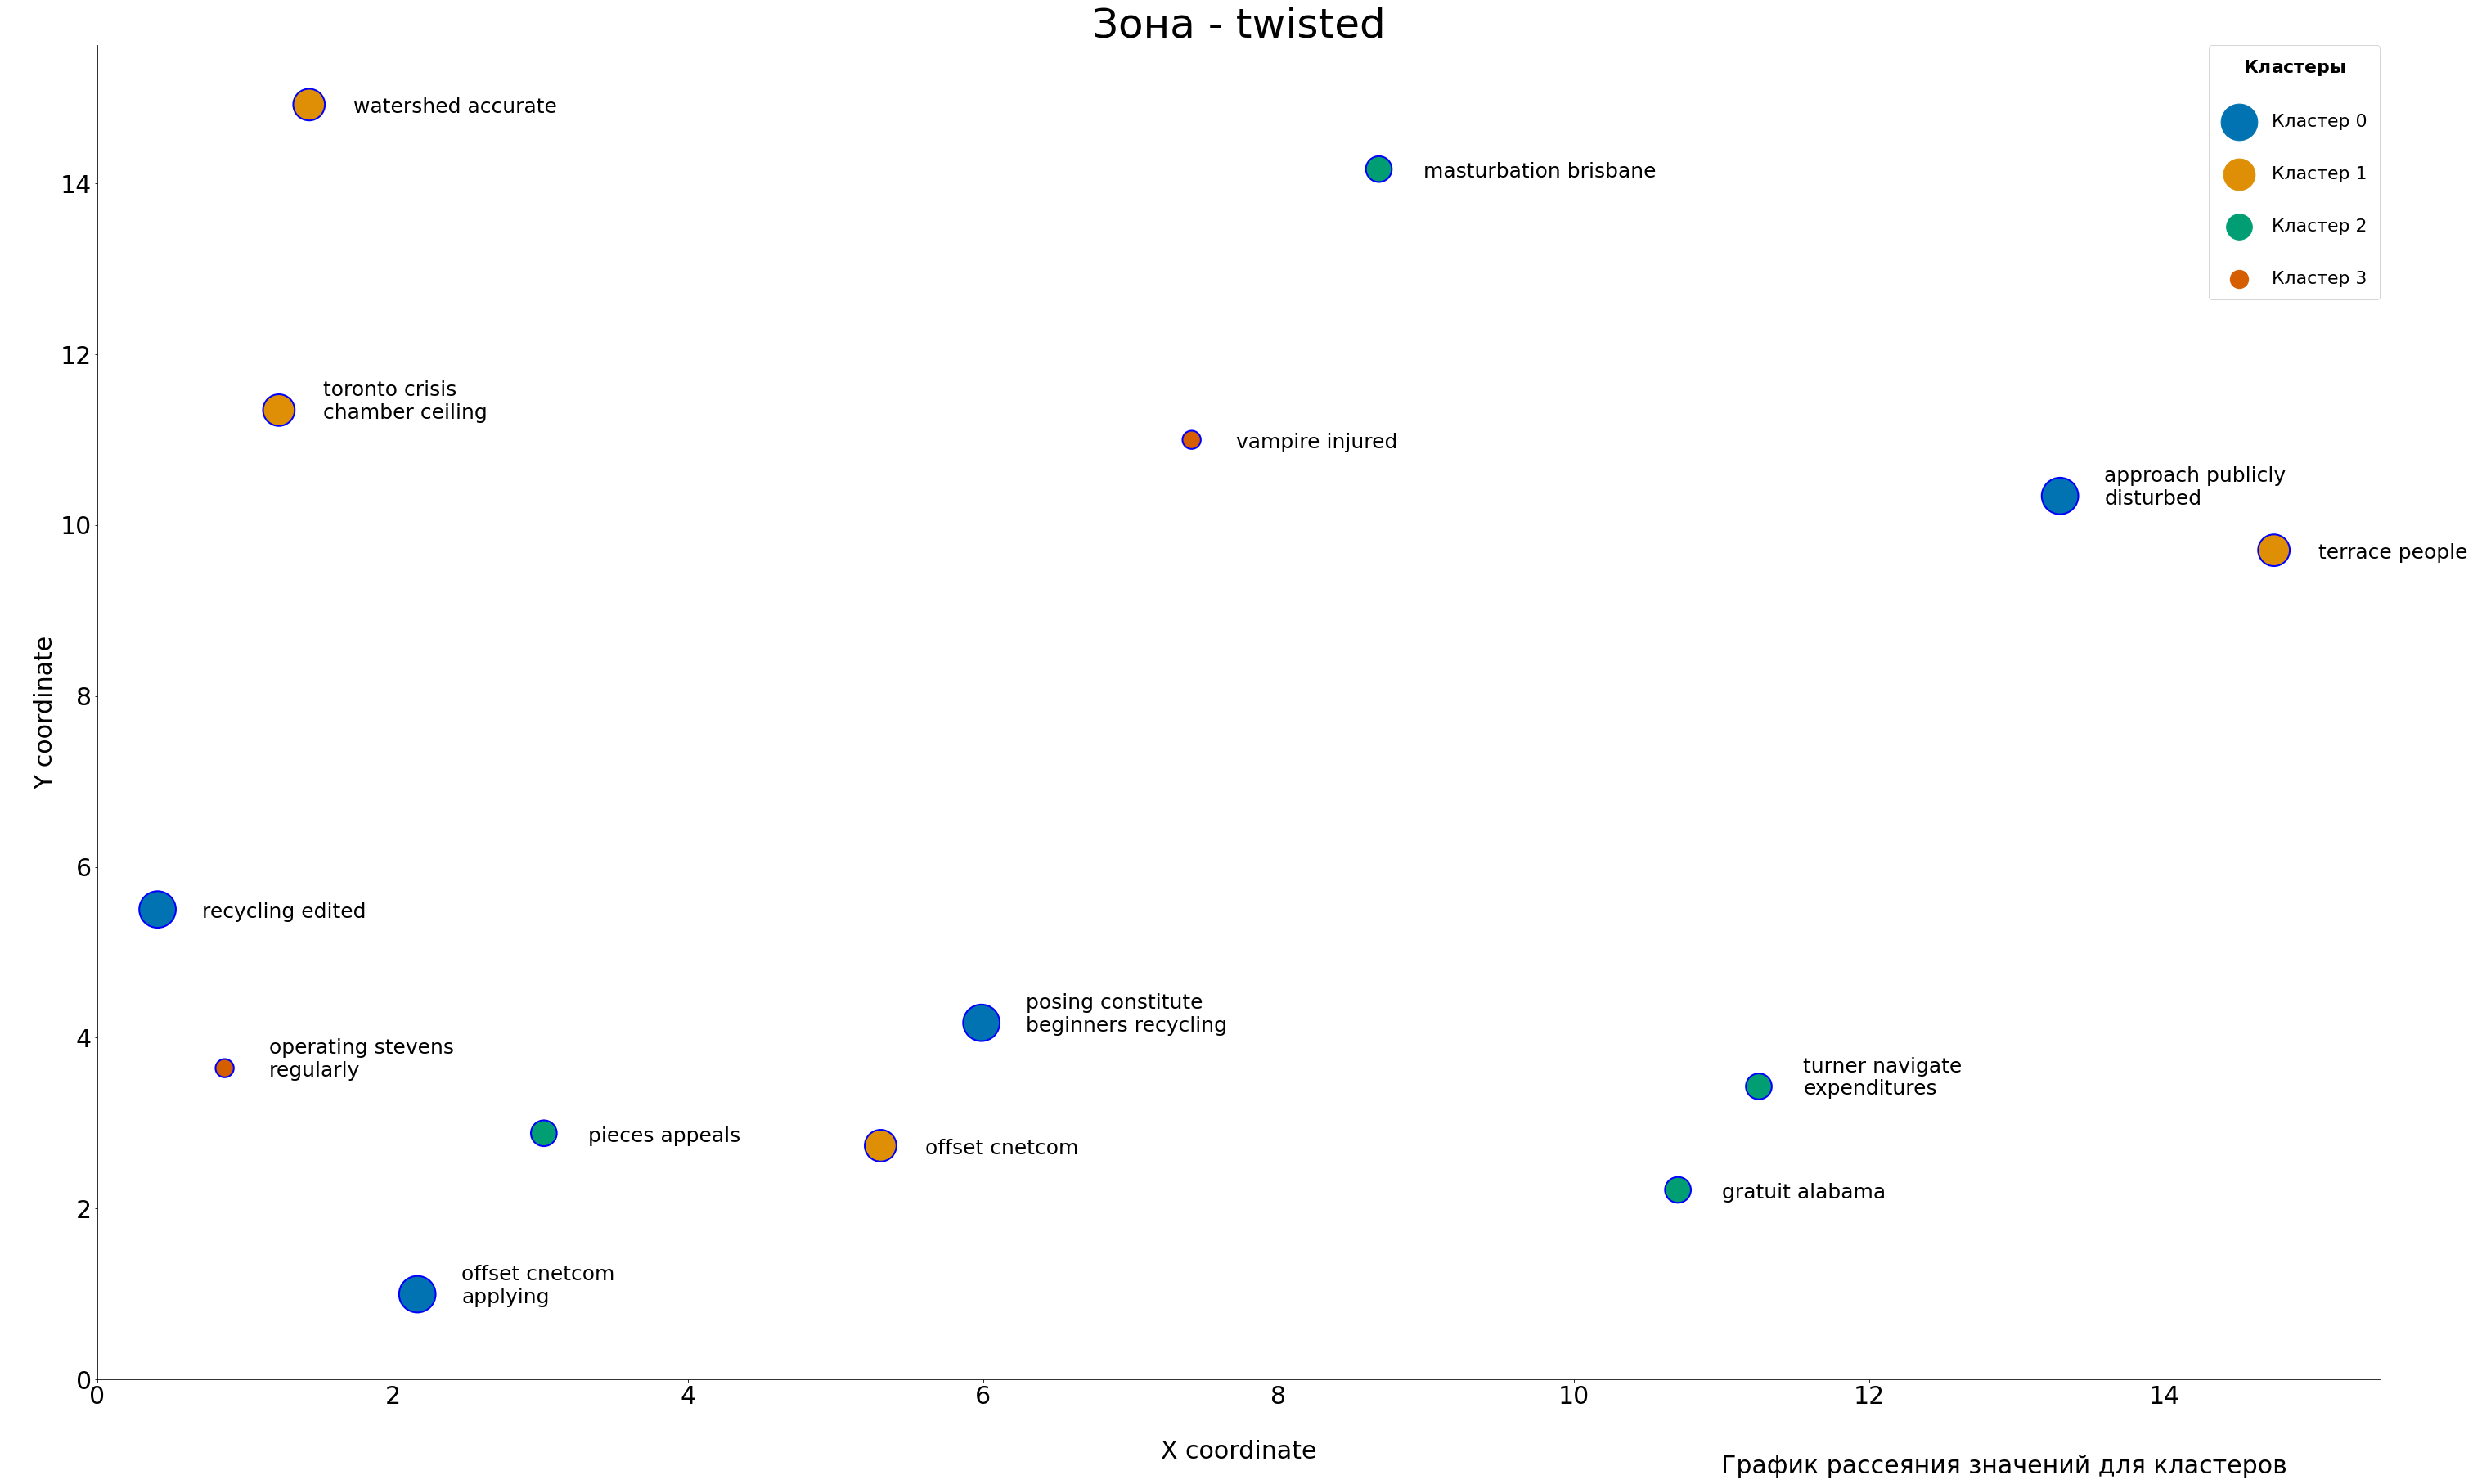

In [191]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

fig, ax = plt.subplots()
sns.scatterplot(x="x", y="y", hue="cluster_name", data=plot_data, palette='colorblind', cmap='RdBu', size = "cluster_name", sizes = (500, 2000), legend="full", edgecolor='b')
sns.despine()
plt.title(f"Зона - {plot_data['area'].iloc[0]}",fontsize=50)
plt.text(11, -1.1, "График рассеяния значений для кластеров", fontsize=30)

plt.xlabel("\nX coordinate",fontsize=30)
plt.ylabel("\nY coordinate",fontsize=30)
plt.xlim(0, None)
plt.ylim(0, None)
plt.tick_params(labelsize=30)

plt.legend(labelspacing = 2, fontsize=22, frameon=True, title="$\\bf{Кластеры}$", title_fontsize=22, borderpad=0.7, borderaxespad=0)
texts = [plt.text(plot_data['x'].iloc[line]+0.3, plot_data['y'].iloc[line]-0.1, plot_data['keyword'].iloc[line], fontsize=25, color='black') for line in range(0, plot_data.shape[0])]

fig.set_size_inches(50, 30)
fig.savefig(f'example_{counter+1}.png')